In [1]:
''' PACKAGES '''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
''' LECTURE TABLEAU EXCEL '''

df = pd.read_excel ('scope_8 (2).xlsx')
# xls = pd.ExcelFile('scope_8 (2).xlsx')
# print(xls.sheet_names)

print (df)

print(df['Re'][3:2001])

            x-axis           Re           Im
0           second         Volt         Volt
1     151.50000e00  10.05930e00  -402.01e-03
2     151.52500e00  10.05930e00  -402.01e-03
3     151.55000e00  10.05930e00  -402.01e-03
4     151.57500e00  10.05930e00  -402.01e-03
...            ...          ...          ...
1996  201.37500e00    25.13e-03  -603.02e-03
1997  201.40000e00   175.88e-03  -603.02e-03
1998  201.42500e00       0.0e00  -603.02e-03
1999  201.45000e00   175.88e-03  -603.02e-03
2000  201.47500e00    25.13e-03  -603.02e-03

[2001 rows x 3 columns]
3       10.05930e00
4       10.05930e00
5       10.01930e00
6       10.01930e00
7       10.01930e00
           ...     
1996      25.13e-03
1997     175.88e-03
1998         0.0e00
1999     175.88e-03
2000      25.13e-03
Name: Re, Length: 1998, dtype: object


In [3]:
''' FAIRE DES LISTE À PARTIR DES DONNEES DU TABLEAU EXCEL '''

L_Re = []
L_Im = []

i=1
while i<= 1998: #on prend les valeurs de 3 à 2001 car les 2 premières lignes ne sont pas des données mais des titres
    L_Re.append(float(df['Re'][2+i])/10)
    L_Im.append(float(df['Im'][2+i])/10)
    i+=1

#on divise par le facteur de conversion entre les valeurs affichées par l'oscillo et le lock-in qui vaut 10
x = np.linspace(0,20000,len(L_Re)) #mesures faites de f=1Hz (approximé à 0) jusqu'à 2*pi*f = 200000 rad.s^-1



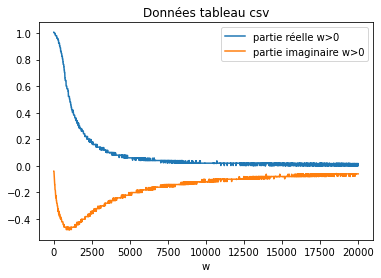

In [4]:
''' TEST DE PLOT '''

plt.plot(x,L_Re,label="partie réelle w>0")
plt.plot(x,L_Im,label="partie imaginaire w>0")
plt.title("Données tableau csv")
plt.xlabel("w")
plt.legend()
plt.savefig("Données tableau.png", dpi=300)
plt.show()

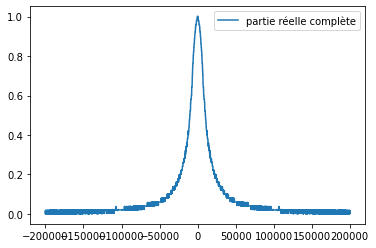

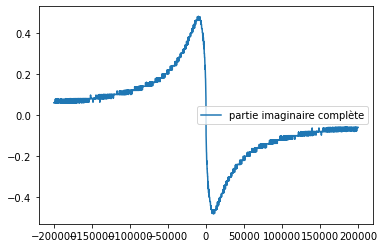

In [5]:
''' TEST MESURES '''

# PARTIE REELLE

L_Re_New_Positif = L_Re[3:2001]
L_Re_New_Negatif = L_Re[3:2001]
L_Re_New_Negatif.reverse()

#on prend le symétrique de ce qu'on a mesuré car on sait que la partie réelle est symétrique (et on ne peut mesurer que pour les fréquences positives)

L_Re_New = L_Re_New_Negatif + L_Re_New_Positif #on concatène les listes pour avoir la fonction finale

x_Re_New = np.linspace(-200000,200000,len(L_Re_New))  
plt.plot(x_Re_New,L_Re_New,label="partie réelle complète")
plt.legend()
plt.show()

# PARTIE IMAGINAIRE

L_Im_New_Positif = L_Im[3:2001]
L_Im_New_Negatif = L_Im[3:2001]
L_Im_New_Negatif.reverse()

for k in range(len(L_Im_New_Negatif)):
    L_Im_New_Negatif[k]*=-1
    
#on prend l'opposé de ce qu'on a mesuré car on sait que la partie imaginaire est antisymétrique (et on ne peut mesurer que pour les fréquences positives)

L_Im_New = L_Im_New_Negatif + L_Im_New_Positif #on concatène les listes pour avoir la fonction finale

x_Im_New = np.linspace(-200000,200000,len(L_Im_New))

plt.plot(x_Im_New,L_Im_New,label="partie imaginaire complète")
plt.legend()
plt.show()

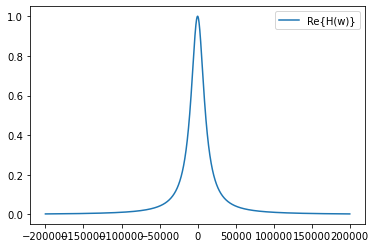

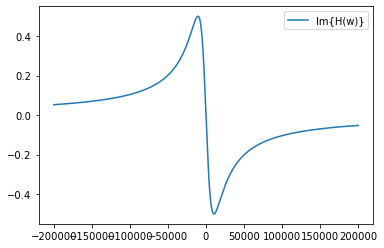

In [6]:
''' TEST CIRCUIT RC THEORIQUE '''

N = len(L_Re_New)
w = np.linspace(-200000,200000,N) 
R = 9900 #R=9.9kOhm
C = 0.0000000096 #C=9.6nF

Re = [1/(1+(R*C*W)**2) for W in w]
Im = [(-R*C*W)/(1+(R*C*W)**2) for W in w]

plt.plot(w,Re,label="Re{H(w)}")
plt.legend()
plt.show()

plt.plot(w,Im,label="Im{H(w)}")
plt.legend()
plt.show()

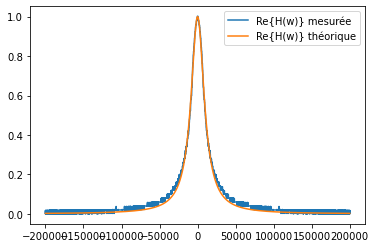

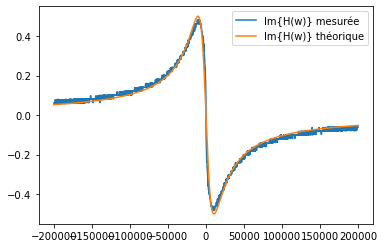

In [7]:
''' TEST MESURE VS THEORIQUE '''

# PARTIE REELLE

plt.plot(x_Re_New,L_Re_New,label="Re{H(w)} mesurée")
plt.plot(w,Re,label="Re{H(w)} théorique")
plt.legend()
plt.savefig("Partie réelle mesurée VS théorique.png", dpi=300)
plt.show()

# PARTIE IMAGINAIRE

plt.plot(x_Im_New,L_Im_New,label="Im{H(w)} mesurée")
plt.plot(w,Im,label="Im{H(w)} théorique")
plt.legend()
plt.savefig("Partie imaginaire mesurée VS théorique.png", dpi=300)
plt.show()

COMMENTAIRE : Allure des courbes bonnes :)

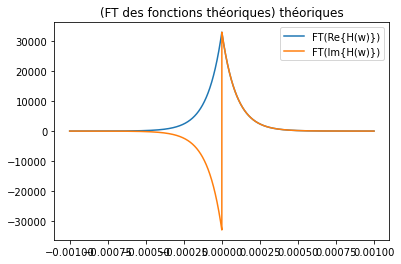

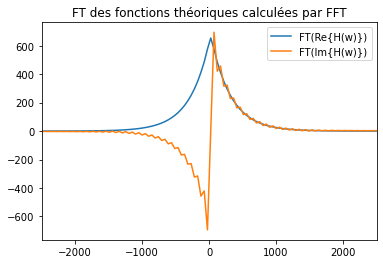

In [8]:
''' TEST FFT SUR LES FONCTIONS THEORIQUE '''

NN = 2**13
t = np.linspace(-1/1000,1/1000,NN) #bornes ??
ww = np.linspace(-200000,200000,NN) #plus on prend de valeurs, plus juste est la FFT

FFT_theorique_Re = [np.pi/(R*C) * np.exp(-np.abs(k)/(R*C)) for k in t] #partie réelle uniquement
FFT_theorique_Im = [np.pi/(R*C) * np.exp(-np.abs(k)/(R*C)) * k/np.abs(k) for k in t] #partie imaginaire uniquement

plt.plot(t,FFT_theorique_Re,label="FT(Re{H(w)})")
plt.plot(t,FFT_theorique_Im,label="FT(Im{H(w)})")
plt.title("(FT des fonctions théoriques) théoriques")
plt.legend()
plt.show()

Re = [1/(1+(R*C*W)**2) for W in ww]
Im = [(-R*C*W)/(1+(R*C*W)**2) for W in ww]

FFT_calculee_Re = np.fft.fftshift(np.fft.fft(Re))
FFT_calculee_Im = np.fft.fftshift(np.fft.fft(Im))

FFT_calculee_Im = FFT_calculee_Im.imag
FFT_calculee_Im_Neg = FFT_calculee_Im[0:int((len(FFT_calculee_Im)/2))]
FFT_calculee_Im_Neg = -1*np.abs(FFT_calculee_Im_Neg)
FFT_calculee_Im_Pos = FFT_calculee_Im[int(len(FFT_calculee_Im)/2):int(len(FFT_calculee_Im))]
FFT_calculee_Im_Pos = np.abs(FFT_calculee_Im_Pos)
FFT_calculee_Im_Fin = np.concatenate((FFT_calculee_Im_Neg, FFT_calculee_Im_Pos))

#print(len(FFT_calculee_Im_Neg))
#print(len(FFT_calculee_Im_Pos))
#print(len(FFT_calculee_Im_Fin))

plt.plot(ww,np.abs(FFT_calculee_Re),label="FT(Re{H(w)})")
plt.plot(ww,FFT_calculee_Im_Fin,label="FT(Im{H(w)})")
plt.xlim([-2500,2500])
plt.title("FT des fonctions théoriques calculées par FFT")
plt.legend()
plt.show()


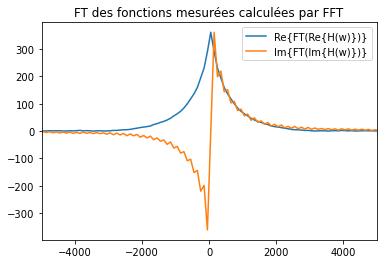

3990


In [9]:
''' TEST FFT SUR LES FONCTIONS MESUREES '''

FFT_calculee_Re_Mes = np.fft.fftshift(np.fft.fft(L_Re_New))
FFT_calculee_Im_Mes = np.fft.fftshift(np.fft.fft(L_Im_New))

FFT_calculee_Re_Mes_Fin = np.abs(FFT_calculee_Re_Mes)

FFT_calculee_Im_Mes = FFT_calculee_Im_Mes.imag
FFT_calculee_Im_Mes_Neg = FFT_calculee_Im_Mes[0:int((len(FFT_calculee_Im_Mes)/2))]
FFT_calculee_Im_Mes_Neg = -1*np.abs(FFT_calculee_Im_Mes_Neg)
FFT_calculee_Im_Mes_Pos = FFT_calculee_Im_Mes[int(len(FFT_calculee_Im_Mes)/2):int(len(FFT_calculee_Im_Mes))]
FFT_calculee_Im_Mes_Pos = np.abs(FFT_calculee_Im_Mes_Pos)
FFT_calculee_Im_Mes_Fin = np.concatenate((FFT_calculee_Im_Mes_Neg, FFT_calculee_Im_Mes_Pos))

plt.plot(x_Re_New,FFT_calculee_Re_Mes_Fin,label="Re{FT(Re{H(w)})}")
plt.plot(x_Im_New,FFT_calculee_Im_Mes_Fin,label="Im{FT(Im{H(w)})}")
plt.xlim([-5000,5000])
plt.title("FT des fonctions mesurées calculées par FFT")
plt.legend()
plt.show()

print(len(L_Re_New))


COMMENTAIRE : allure des courbes bonnes :)

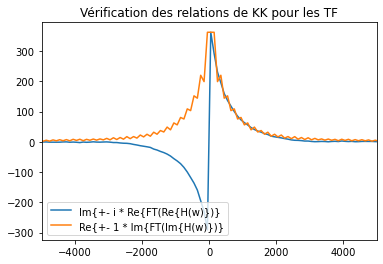

In [10]:
FFT_calculee_Im_Mes_Fin_Neg = -1 * FFT_calculee_Im_Mes_Fin[0:int((len(FFT_calculee_Im_Mes)/2))]
FFT_calculee_Im_Mes_Fin_Pos = FFT_calculee_Im_Mes_Fin[int(len(FFT_calculee_Im_Mes)/2):int(len(FFT_calculee_Im_Mes))]
FFT_calculee_Im_Mes_Fin_bis = np.concatenate((FFT_calculee_Im_Mes_Fin_Neg, FFT_calculee_Im_Mes_Fin_Pos))
FFT_calculee_Im_Mes_Fin_bis[1995] = FFT_calculee_Re_Mes_Fin[1995]

FFT_calculee_Re_Mes_Fin_Neg = -1 * FFT_calculee_Re_Mes_Fin[0:int((len(FFT_calculee_Re_Mes)/2))]
FFT_calculee_Re_Mes_Fin_Pos = FFT_calculee_Re_Mes_Fin[int(len(FFT_calculee_Re_Mes)/2):int(len(FFT_calculee_Re_Mes))]
FFT_calculee_Re_Mes_Fin_bis = np.concatenate((FFT_calculee_Re_Mes_Fin_Neg, FFT_calculee_Re_Mes_Fin_Pos))

plt.plot(x_Re_New,FFT_calculee_Re_Mes_Fin_bis,label="Im{+- i * Re{FT(Re{H(w)})}")
plt.plot(x_Im_New,FFT_calculee_Im_Mes_Fin_bis,label="Re{+- 1 * Im{FT(Im{H(w)})}")
plt.xlim([-5000,5000])
plt.title("Vérification des relations de KK pour les TF")
plt.legend()
plt.show()

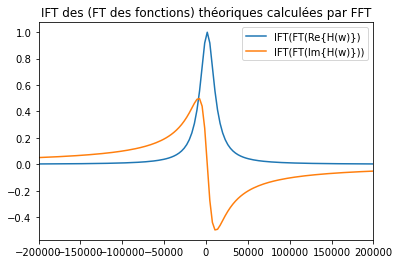

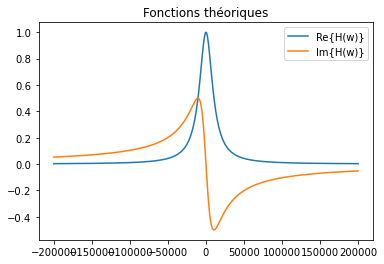

In [11]:
''' TEST IFFT SUR LES FONCTIONS THEORIQUE '''

wwbis = np.linspace(-12560000,12560000,NN) #bornes = 200000 * 2pi

IFFT_calculee_Re = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_theorique_Re)))
IFFT_calculee_Im = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_theorique_Im)))

IFFT_calculee_Re = IFFT_calculee_Re.real /3141 #on divise par (pi * 1000)
IFFT_calculee_Im = -1 * IFFT_calculee_Im.imag /3141

plt.plot(wwbis,IFFT_calculee_Re,label="IFT(FT(Re{H(w)})")
plt.plot(wwbis,IFFT_calculee_Im,label="IFT(FT(Im{H(w)}))")
plt.title("IFT des (FT des fonctions) théoriques calculées par FFT")
plt.xlim([-200000,200000])
plt.legend()
plt.show()

plt.plot(ww,Re,label="Re{H(w)}")
plt.plot(ww,Im,label="Im{H(w)}")
plt.title("Fonctions théoriques")
plt.legend()
plt.show()

COMMENTAIRE : ok ça marche !!! :)

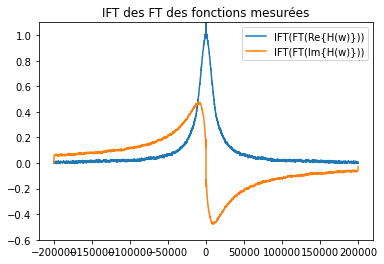

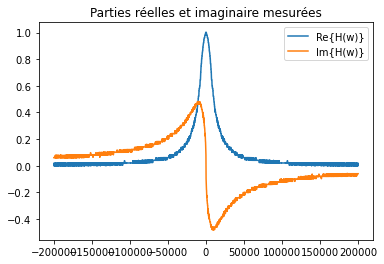

In [12]:
''' IFFT SUR LES FONCTIONS MESUREES '''

IFFT_calculee_Re_Mes = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Re_Mes_Fin)))
IFFT_calculee_Im_Mes = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Im_Mes_Fin)))

IFFT_calculee_Re_Mes = IFFT_calculee_Re_Mes.real
IFFT_calculee_Im_Mes = -1 * IFFT_calculee_Im_Mes.imag

plt.plot(x_Re_New,IFFT_calculee_Re_Mes,label="IFT(FT(Re{H(w)}))")
plt.plot(x_Im_New,IFFT_calculee_Im_Mes,label="IFT(FT(Im{H(w)}))")
plt.title("IFT des FT des fonctions mesurées")
plt.ylim([-0.6,1.1])
plt.legend()
plt.show()

plt.plot(x_Re_New,L_Re_New,label="Re{H(w)}")
plt.plot(x_Im_New,L_Im_New,label="Im{H(w)}")
plt.title('Parties réelles et imaginaire mesurées')
plt.legend()
plt.show()

#ICI ON VERIFIE JUSTE QUE IFT(FT(RE)) = RE et IFT(FT(IM)) = IM (on vérifie que f-1(f) = identité donc on vérifie rien)

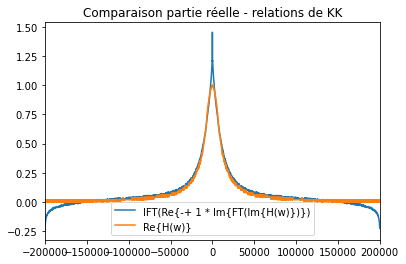

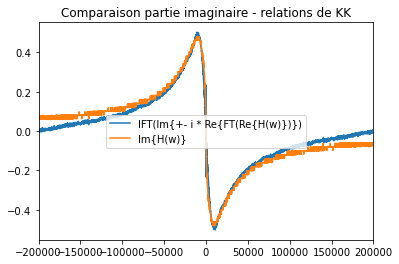

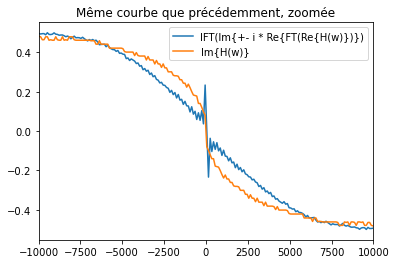

In [13]:
''' IFFT SUR LES FONCTIONS MESUREES '''

IFFT_calculee_Re_Mes = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Im_Mes_Fin_bis))) #on vérifie que IFT(Re(+-1 Im(FT(Im)))) = Re
IFFT_calculee_Im_Mes = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(FFT_calculee_Re_Mes_Fin_bis))) #on vérifie que IFT(Im(+-i Re(FT(Re)))) = Im

IFFT_calculee_Re_Mes = IFFT_calculee_Re_Mes.real
IFFT_calculee_Im_Mes = -1 * IFFT_calculee_Im_Mes.imag

plt.plot(x_Re_New,IFFT_calculee_Re_Mes,label="IFT(Re{-+ 1 * Im{FT(Im{H(w)})})")
plt.plot(x_Re_New,L_Re_New,label="Re{H(w)}")
plt.title("Comparaison partie réelle - relations de KK")
plt.legend()
plt.xlim([-200000,200000])
plt.show()

plt.plot(x_Im_New,IFFT_calculee_Im_Mes,label="IFT(Im{+- i * Re{FT(Re{H(w)})})")
plt.plot(x_Im_New,L_Im_New,label="Im{H(w)}")
plt.title('Comparaison partie imaginaire - relations de KK')
plt.legend()
plt.xlim([-200000,200000])
plt.show()

plt.plot(x_Im_New,IFFT_calculee_Im_Mes,label="IFT(Im{+- i * Re{FT(Re{H(w)})})")
plt.plot(x_Im_New,L_Im_New,label="Im{H(w)}")
plt.title('Même courbe que précédemment, zoomée')
plt.legend()
plt.xlim([-10000,10000])
plt.show()

COMMENTAIRE : quelques erreurs aux bornes +-inf (inf=200000) et en 0 car FFT et IFFT : du bruit se rajoute à chaque fois en plus du bruit initial, mais sinon on est bon !
AUTRE COMMENTAIRE : On n'a pas une puissance de 2 pour le nombre de valeurs dans notre algorithme de FFT, en fait c'est pas grave, techniquement ça rajoute juste du temps de calcul mais ça reste très correct (on a testé en croppant les listes de valeurs pour avoir une puissance de 2, et les résultats sont les mêmes)

<ipython-input-15-351484ee2466>:3: RuntimeWarning: divide by zero encountered in true_divide
  diff_Re = (L_Re_New-IFFT_calculee_Re_Mes)**2/np.abs(L_Re_New)


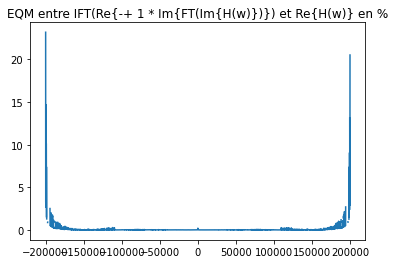

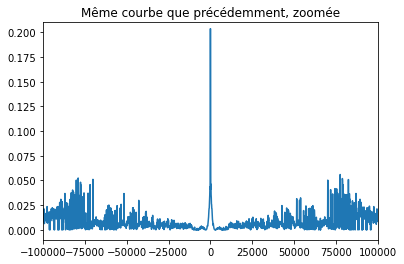

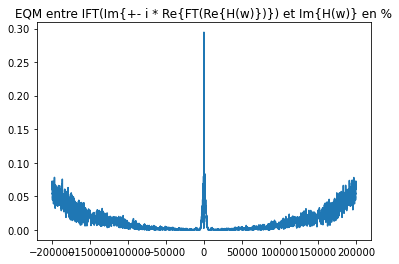

In [15]:
''' PLOT DES DIFFERENCES '''

diff_Re = (L_Re_New-IFFT_calculee_Re_Mes)**2/np.abs(L_Re_New)

diff_Im = (L_Im_New-IFFT_calculee_Im_Mes)**2/np.abs(L_Im_New)

plt.plot(x_Re_New,diff_Re)
plt.title("EQM entre IFT(Re{-+ 1 * Im{FT(Im{H(w)})}) et Re{H(w)} en %")
plt.show()

plt.plot(x_Re_New,diff_Re)
plt.title("Même courbe que précédemment, zoomée")
plt.xlim([-100000,100000])
plt.ylim([-0.01,0.21])
plt.show()

plt.plot(x_Re_New,diff_Im)
plt.title("EQM entre IFT(Im{+- i * Re{FT(Re{H(w)})}) et Im{H(w)} en %")
plt.show()

*EQM = Ecart Quadratique Moyen

COMMENTAIRE : il est normal d'observer une différence "significative" en 0 et aux bornes +-infini à cause de l'algorithme de DFT et de ses coupages et shifts en 0 et aux bornes +-infini (rappelons qu'on ne peut pas faire des mesures infinies donc il y a des divergences en 0 et +-infini qui s'ajoutent pendant la FT et pendant la IFT, en effet on peut voir sur la figure "Vérification des relations de KK pour les TF" que les DFT ne donnent pas les formes exactes des courbes attendues, qui figures sur le graphique "(FT des fonctions théoriques) théoriques") mais en général, les différences sont quand même assez faibles !